# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Generation of Figures


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src\figures</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_Figures.ipynb</code>
</p>


In [1]:
from datetime import datetime

print("\033[32m{}\033[0m".format(datetime.now().strftime("%B %d, %Y %H:%M:%S")))

June 20, 2022 10:05:02


In [2]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from datetime import datetime

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from src.helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from src.helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from src.helpers.helpers_predator.common import (
    load_predator, export_data
)

from src.helpers.mylogger import get_handler
import logging

from src.helpers.labels import ClassLabels

handler_simple = get_handler('simple')
log_simple = logging.getLogger('Figures')
log_simple.handlers[:] = []
log_simple.addHandler(handler_simple)
log_simple.setLevel(logging.DEBUG)

os.chdir("../")

# PATHS
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [3]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-20 10:05:05 | INFO     | src.helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


In [4]:
def get_sampled_datasets_label_counts(sampled_train_data_list):
    sampled_train_data_to_label_counts = {}
    for i, sampled_train_data in enumerate(sampled_train_data_list):
        label_counts = sampled_train_data["Mutation_Effect_Label"].value_counts()
        sampled_train_data_to_label_counts["SAMPLED_TRAIN_DATA_" + str(i + 1)] = [
            label_counts.loc[0],
            label_counts.loc[1],
        ]
    sampled_datasets_label_counts = pd.DataFrame(sampled_train_data_to_label_counts).T
    sampled_datasets_label_counts.rename(columns={ClassLabels.DISRUPTING: "Disrupting", ClassLabels.NONDISRUPTING: "Increasing+NoEff"}, inplace=True)
    sampled_datasets_label_counts.index.name = "SAMPLED_TRAIN_DATA"
    sampled_datasets_label_counts.reset_index(inplace=True)
    return sampled_datasets_label_counts

In [5]:
def visualize_sampled_train_datasets_label_counts_std_dev(sampled_train_data_list, kind):

    sampled_datasets_label_counts = get_sampled_datasets_label_counts(
        sampled_train_data_list
    )

    experiment_statistics_data_melted = pd.melt(
        sampled_datasets_label_counts,
        id_vars=["SAMPLED_TRAIN_DATA"],
        value_vars=["Disrupting", "Increasing+NoEff"],
        var_name="MUTATION_EFFECT",
        value_name="LABEL_COUNT",
    )

    medians = experiment_statistics_data_melted.groupby(['MUTATION_EFFECT'])['LABEL_COUNT'].median()
    std_dev = experiment_statistics_data_melted.groupby(['MUTATION_EFFECT'])['LABEL_COUNT'].std()
    vertical_offset = experiment_statistics_data_melted['LABEL_COUNT'].median() * 0.05  # offset from median for display

    if kind in ["strip", "box"]:

        plt.figure(figsize=(3, 4))

        if kind == "strip":
            plot = sns.stripplot(
                x="MUTATION_EFFECT",
                y="LABEL_COUNT",
                data=experiment_statistics_data_melted,
                palette="ch:s=-.2,r=.6",
                jitter=True,
            )

        elif kind == "box":
            plot = sns.boxplot(
                x="MUTATION_EFFECT",
                y="LABEL_COUNT",
                data=experiment_statistics_data_melted,
                # palette="ch:s=-.2,r=.6",
            )

        else:
            raise ValueError

        for xtick in plot.get_xticks():
            plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick],
                      horizontalalignment='left', size='small', color='k')

    elif kind == "bar":
        sampled_datasets_label_counts.plot(
            figsize=(25, 4), kind="bar", color=["#E3D9C1", "#27213F"],
            title='Label Counts per Experiment', xlabel='Experiment', ylabel='Counts',
            rot=0
        )

    else:
        log_simple.error(f"Parameter `kind` must be either `strip` or `bar`, not `{kind}`")
        
    
    print(f"std_dev: {std_dev}")


std_dev: MUTATION_EFFECT
Disrupting          1.613843
Increasing+NoEff    1.613843
Name: LABEL_COUNT, dtype: float64


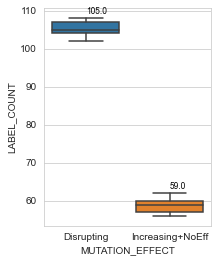

In [6]:
visualize_sampled_train_datasets_label_counts_std_dev(predator.data_materials["sampled_train_data_list"], kind='box')

### Updating Figure 2: Performance Comparison of Selected Features

In [7]:
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,All Columns,SHAP Columns (5),SHAP Columns (10),SHAP Columns (20),SHAP Columns (30),SHAP Columns (40)
METRIC,,,,,,,,
ACCURACY,0.621396,0.582794,0.718186,0.718248,0.733790,0.733018,0.730140,0.726856
BALANCED_ACCURACY,0.597916,0.551764,0.658556,0.673020,0.690744,0.683184,0.677386,0.668126
F1,0.697000,0.665246,0.798404,0.788120,0.802778,0.804440,0.803270,0.801348
F1_MACRO,0.585278,0.540268,0.653624,0.667366,0.686020,0.679512,0.670796,0.666882
F1_MICRO,0.620894,0.584780,0.719080,0.718500,0.736040,0.735270,0.728198,0.726612
MCC,0.199666,0.105636,0.363190,0.370278,0.409616,0.407112,0.388386,0.379116
PRECISION,0.716972,0.682258,0.741760,0.760742,0.770734,0.762214,0.756280,0.752060
PRECISION_MACRO,0.600654,0.553166,0.708322,0.706194,0.724768,0.728716,0.721222,0.717436
PRECISION_MICRO,0.621334,0.585382,0.717094,0.716728,0.734916,0.733966,0.730330,0.726398


In [8]:
predator.eval_metrics.scoring_metrics_data.columns

Index(['Provean', '$\Delta\Delta$G', 'All Columns', 'SHAP Columns (5)',
       'SHAP Columns (10)', 'SHAP Columns (20)', 'SHAP Columns (30)',
       'SHAP Columns (40)'],
      dtype='object')

In [9]:
updated_column_names = [
    "Provean",
    "$\Delta\Delta$G",
    "Predator_all",
    "Predator_SHAP_Top_5",
    "Predator_SHAP_Top_10",
    "Predator_SHAP_Top_20",
    "Predator_SHAP_Top_30",
    "Predator_SHAP_Top_40",
]

In [10]:
predator.eval_metrics.scoring_metrics_data.columns = updated_column_names
predator.eval_metrics.scoring_metrics_data

,Provean,$\Delta\Delta$G,Predator_all,Predator_SHAP_Top_5,Predator_SHAP_Top_10,Predator_SHAP_Top_20,Predator_SHAP_Top_30,Predator_SHAP_Top_40
METRIC,,,,,,,,
ACCURACY,0.621396,0.582794,0.718186,0.718248,0.733790,0.733018,0.730140,0.726856
BALANCED_ACCURACY,0.597916,0.551764,0.658556,0.673020,0.690744,0.683184,0.677386,0.668126
F1,0.697000,0.665246,0.798404,0.788120,0.802778,0.804440,0.803270,0.801348
F1_MACRO,0.585278,0.540268,0.653624,0.667366,0.686020,0.679512,0.670796,0.666882
F1_MICRO,0.620894,0.584780,0.719080,0.718500,0.736040,0.735270,0.728198,0.726612
MCC,0.199666,0.105636,0.363190,0.370278,0.409616,0.407112,0.388386,0.379116
PRECISION,0.716972,0.682258,0.741760,0.760742,0.770734,0.762214,0.756280,0.752060
PRECISION_MACRO,0.600654,0.553166,0.708322,0.706194,0.724768,0.728716,0.721222,0.717436
PRECISION_MICRO,0.621334,0.585382,0.717094,0.716728,0.734916,0.733966,0.730330,0.726398


In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_performance_comparison_results(scoring_metrics_data_melted, metrics, filename):
    # sns.set_theme(style="ticks", palette="pastel", font_scale=1.5)  # TODO: POSTER,uncommendLATER
    sns.set_theme(style="ticks", palette="pastel", font_scale=2)
    # TODO: [later] plot size adjusting itself depending on input ↓
    # plt.figure(figsize=(3 * len(metrics), 7))
    plt.figure(figsize=(5, 6))
    # title_string_1 = fr"Performance\ Comparison\ of\ Selected\ Features\ vs.\ All\ Features"
    # title_string_2 = fr"CV = 10, CV\_repeat = {self.n_repeats}, Experiment\_repeat = {self.n_experiment}"
    # title_string_1 = fr"Performance\ Comparison\ of\ Selected\ Features"
    # title_string_2 = ""
    title_string_1 = fr"Balanced\ Accuracy\ of\ Feature\ Sets"
    title_string_2 = ""
    # plt.title(f"$\mathbf{{{title_string_1}}}$ \n $\mathbf{{{title_string_2}}}$", fontsize=24, fontweight='bold')
    # plt.ylabel('Metrics', fontsize=24, fontweight='bold')
#     plt.title(f"$\mathbf{{{title_string_1}}}$ \n $\mathbf{{{title_string_2}}}$", fontsize=24, fontweight='bold')
#     plt.title(f"$\mathbf{{{title_string_1}}}$ \n $\mathbf{{{title_string_2}}}$", fontweight='bold')
    plt.title(f"$\mathbf{{{title_string_1}}}$", fontweight='bold')

    plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.8, lw=0.5)
    # noinspection SpellCheckingInspection

    if metrics is not None:
        scoring_metrics_data_melted_less_metrics = scoring_metrics_data_melted[
            scoring_metrics_data_melted['METRIC'].isin(metrics)
        ]
        scoring_metrics_data_plot = scoring_metrics_data_melted_less_metrics

    else:
        scoring_metrics_data_plot = scoring_metrics_data_melted

    # ax = sns.boxplot(x='METRIC', y='SCORE', hue='FEATURES', data=scoring_metrics_data_melted_less_metrics,
    #                  palette='Pastel1')  # bone, vlag, cividis, #03012d, light:#444452

    ax = sns.boxplot(x='METRIC', y='SCORE', hue='FEATURES', data=scoring_metrics_data_plot,
                     palette='Pastel1')  # bone, vlag, cividis, #03012d, light:#444452
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#     ax.xaxis.grid(True, which='minor', color='#ababab', lw=1)
    # legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), edgecolor="black") ############
    # legend.get_frame().set_alpha(None)
    ###################
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), framealpha=0)
    # plt.tight_layout()  # poster purpose
    # plt.savefig('foo2.png')  # poster purpose
    
    
    #     plt.ylabel('Metrics', fontsize=24, fontweight='bold')
#     plt.ylabel('Balanced Accuracy', fontsize=16, fontweight='bold')
    plt.ylabel('Balanced Accuracy')
#     plt.xlabel('Balanced Accuracy', fontsize=24, fontweight='bold')

    plt.xticks([])
    plt.xlabel('', fontsize=24, fontweight='bold')
    
    
    if filename is None:
        filename = "figures/performance_comparison_selected_features.pdf"
    else:
        filename = f"figures/{filename}.pdf"
#     if op.isfile(filename):
#         raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print(f"Plot {filename} is exported.")

    plt.show()
    # sns.despine(offset=10, trim=True)


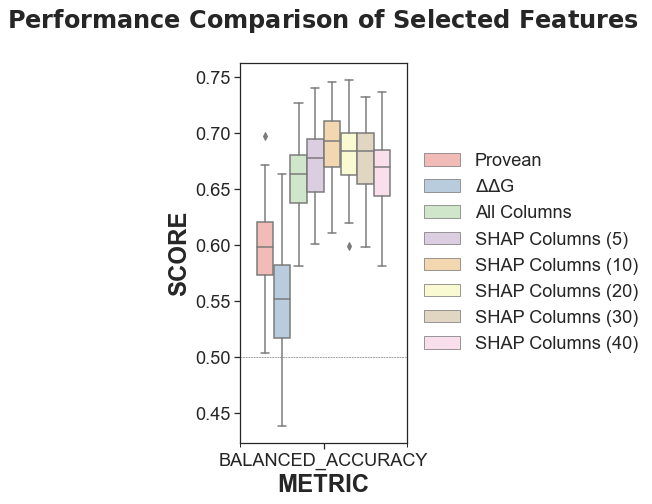

In [12]:
# metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
metrics = ["BALANCED_ACCURACY"]
predator.eval_metrics.plot_performance_comparison_results(metrics)
# last remained here: 23th oct night. -- this cell is almost completed (maybe squeeze the width a bit.)

In [13]:
def change_shap_top_names(feature_name: str):
    mapping = {
        'Provean': "Provean score only",
        '$\Delta\Delta$G': "$\Delta\Delta$G score only",
        'All Columns': "Predator_all",
        'SHAP Columns (5)': "Predator_SHAP_Top_5",
        'SHAP Columns (10)': "Predator",
        'SHAP Columns (20)': "Predator_SHAP_Top_20",
        'SHAP Columns (30)': "Predator_SHAP_Top_30",
        'SHAP Columns (40)': "Predator_SHAP_Top_40",
    }

    return mapping[feature_name]

In [14]:
foo = predator.eval_metrics.scoring_metrics_data_melted.copy()
foo["FEATURES"] = foo["FEATURES"].apply(lambda x: change_shap_top_names(x))
foo

,X_NAME,FEATURES,EXPERIMENT_NO,METRIC,SCORE
0,X_train_exp_0_provean,Provean score only,0,F1,0.7377
1,X_train_exp_0_ddG,$\Delta\Delta$G score only,0,F1,0.6100
2,X_train_exp_0,Predator_all,0,F1,0.7740
3,X_train_exp_0_shap_5,Predator_SHAP_Top_5,0,F1,0.7771
4,X_train_exp_0_shap_10,Predator,0,F1,0.8030
...,...,...,...,...,...
83,X_train_exp_49_shap_5,Predator_SHAP_Top_5,49,MCC,0.2744
84,X_train_exp_49_shap_10,Predator,49,MCC,0.3354
85,X_train_exp_49_shap_20,Predator_SHAP_Top_20,49,MCC,0.3483
86,X_train_exp_49_shap_30,Predator_SHAP_Top_30,49,MCC,0.2923


Plot figures/performance_comparison_selected_features_balanced_acc.pdf is exported.


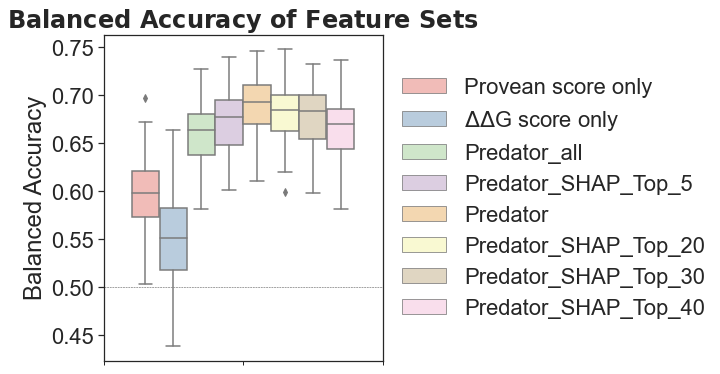

In [15]:
plot_performance_comparison_results(
    foo, metrics, "performance_comparison_selected_features_balanced_acc"
)

Plot figures/performance_comparison_selected_features_balanced_acc.pdf is exported.


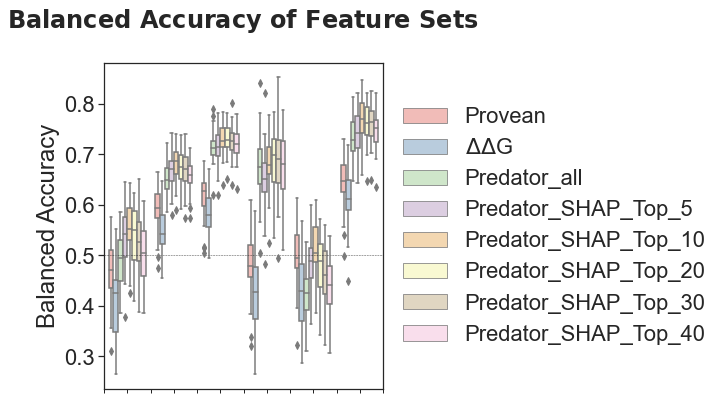

In [19]:
# metrics = ["F1", "BALANCED_ACCURACY", "ACCURACY", "PRECISION", "RECALL", "ROC_AUC"]
# plot_performance_comparison_results(
#     foo, metrics, "performance_comparison_selected_features_balanced_acc"
# )

## Figure 4: removing qualified models and only balanced accuracy

In [47]:
scores_data = pd.read_clipboard()

In [48]:
scores_data

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.696970,0.619048,Tuned+FeatureSelected
1,1,0.696970,0.708333,Tuned+FeatureSelected
2,2,0.787879,0.761905,Tuned+FeatureSelected
3,3,0.727273,0.659091,Tuned+FeatureSelected
4,4,0.727273,0.681818,Tuned+FeatureSelected
5,5,0.666667,0.648810,Tuned+FeatureSelected
6,6,0.575758,0.559524,Tuned+FeatureSelected
7,7,0.727273,0.714286,Tuned+FeatureSelected
8,8,0.848485,0.840909,Tuned+FeatureSelected
9,9,0.727273,0.696429,Tuned+FeatureSelected


In [20]:
def comparison_across_model_types(scores, n_experiment):
    sns.set_theme(style="ticks", palette="Set3", font_scale=1.65)  # twilight_shifted_r
    # sns.set(style="ticks", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    
    default_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["initial_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["initial_scoring"]["balan_acc_scores"],
        "Models_type": "Default"
    })

    feature_selected_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["feature_selected_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["feature_selected_scoring"]["balan_acc_scores"],
        "Models_type": "Default+FeatureSelected"
    })

    tuned_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["finalized_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["finalized_scoring"]["balan_acc_scores"],
        "Models_type": "Tuned+FeatureSelected"
    })
    
#     print("Default data:")
#     display(default_data.head())
#     print("= = = = = = = = =")
    
#     print("feature_selected data:")
#     display(feature_selected_data.head())
#     print("= = = = = = = = =")
    
#     print("tuned data:")
#     display(tuned_data.head())
#     print("= = = = = = = = =")
    
    df_melted = pd.concat(
        [default_data, feature_selected_data, tuned_data]
    ).melt(
        id_vars=['Experiment', 'Models_type'],
        value_vars=['Acc_scores', 'Balan_acc_scores'],
        var_name='METRIC',
        value_name='SCORES'
    )
    
#     print("melted data:")
#     display(df_melted.head())
#     print("= = = = = = = = =")
    
    df_melted_balan_acc = df_melted[
        df_melted["METRIC"] == "Balan_acc_scores"
    ]
    
    plt.figure(figsize=(6, 6))
    
    sns.boxplot(x='Models_type', y='SCORES', data=df_melted_balan_acc)
    # sns.boxplot(x='METRIC', y='SCORES', hue='Models_type', data=df_melted_balan_acc)#
    
    title_string_1 = fr"Performance\ on\ Validation\ Data"
    
    plt.title(f"$\mathbf{{{title_string_1}}}$", fontsize=16, fontweight='bold')
#     plt.ylabel("Balanced acc scores")
    plt.xlabel("Model Type")
    plt.xticks(ticks=[0, 1, 2], labels=["Predator_all", "Predator_SHAP_Top_10", "Predator_SHAP_Top_10  + tuning"], ha='right', rotation=45)
#     plt.xticks(x, labels, rotation='vertical')
    plt.ylabel(None)
    filename = "figures/performance_comparison_validation_data.pdf"
#     if op.isfile(filename):
#         raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print(f"Plot {filename} is exported.")
    
    plt.show()

In [21]:
def comparison_across_model_types_without_tuning(scores, n_experiment):
    sns.set_theme(style="ticks", palette="Set3", font_scale=1.65)  # twilight_shifted_r
    # sns.set(style="ticks", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks

    default_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["initial_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["initial_scoring"]["balan_acc_scores"],
        "Models_type": "Default"
    })

    feature_selected_data = pd.DataFrame({
        "Experiment": [e for e in range(n_experiment)],
        "Acc_scores": scores["feature_selected_scoring"]["acc_scores"],
        "Balan_acc_scores": scores["feature_selected_scoring"]["balan_acc_scores"],
        "Models_type": "Default+FeatureSelected"
    })

    df_melted = pd.concat(
        [default_data, feature_selected_data]
    ).melt(
        id_vars=['Experiment', 'Models_type'],
        value_vars=['Acc_scores', 'Balan_acc_scores'],
        var_name='METRIC',
        value_name='SCORES'
    )

    df_melted_balan_acc = df_melted[
        df_melted["METRIC"] == "Balan_acc_scores"
    ]

    plt.figure(figsize=(6, 6))

    sns.boxplot(x='Models_type', y='SCORES', data=df_melted_balan_acc)
    # sns.boxplot(x='METRIC', y='SCORES', hue='Models_type', data=df_melted_balan_acc)#

    title_string_1 = fr"Balanced\ Accuracies\ on\ Validation\ Data"

    # plt.title(f"$\mathbf{{{title_string_1}}}$", fontsize=16, fontweight='bold')
    #     plt.ylabel("Balanced acc scores")
    plt.xlabel("Model Type")
    plt.xticks(ticks=[0, 1], labels=["Predator_all", "Predator_SHAP_Top_10"], ha='right', rotation=45)
    #     plt.xticks(x, labels, rotation='vertical')
    plt.ylabel(None)
    file_date = datetime.today().strftime('%Y-%m-%d')
    filename = f"figures/performance_comparison_validation_data_without_tuning_{file_date}.pdf"
    #     if op.isfile(filename):
    #         raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Plot {filename} is exported.")

    plt.show()

Plot figures/performance_comparison_validation_data_without_tuning_2022-06-20.pdf is exported.


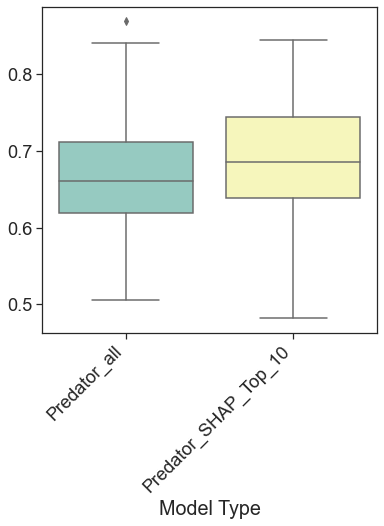

In [22]:
comparison_across_model_types_without_tuning(predator.eval_valid.scores, predator.n_experiment)

Plot figures/performance_comparison_validation_data.pdf is exported.


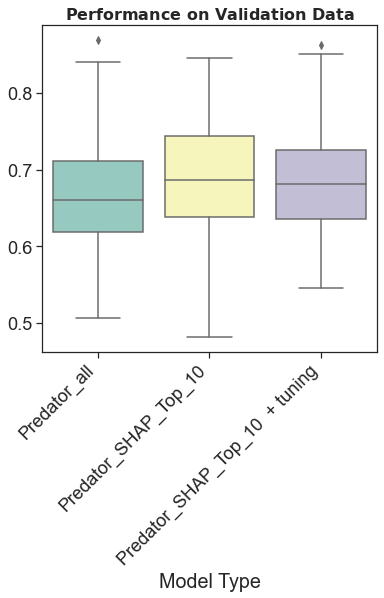

In [23]:
comparison_across_model_types(predator.eval_valid.scores, predator.n_experiment)

## Figure 3: aggregated top 10 feature distribution

In [24]:
def visualize_distribution_top_n_features(shap_feature_selector, top_n):
    # plt.figure(figsize=(12, 12))  # poster purpose
    # sns.set(style='white', font_scale=2.5)  # poster purpose
    feature_to_counts = {}
    for feature in shap_feature_selector.n_features_to_aggregated_features[top_n]:
        count = (shap_feature_selector.aggregated_feature_selector
                 .n_features_to_selected_features_occurrences_counts[top_n])[feature]
        feature_to_counts[feature] = count

    counts_data = pd.DataFrame(feature_to_counts, index=['counts'])
    counts_data = pd.melt(counts_data, var_name='FEATURES', value_name='COUNTS')
    sns.barplot(x='FEATURES', y='COUNTS', color="#4C4C4C", data=counts_data)
    
    # plt.title(f'Distribution of top {top_n} features', fontweight="bold")
    plt.xlabel(None)
    plt.xticks(ha='right', rotation=45)

    sns.despine(right=True)
    # plt.tight_layout() # poster purpose
    # plt.savefig('foo.png')  # poster purpose
    
    plt.ylabel("Counts")
    plt.yticks([0, 10, 20, 30, 40, 50])
    file_date = datetime.today().strftime('%Y-%m-%d')
    filename = f"figures/distribution_of_top_{top_n}_features_{file_date}.pdf"
#     if op.isfile(filename):
#         raise FileExistsError
    plt.savefig(filename, dpi=300, bbox_inches='tight') 
    print("Plot is exported.")
    
    plt.show()

Plot is exported.


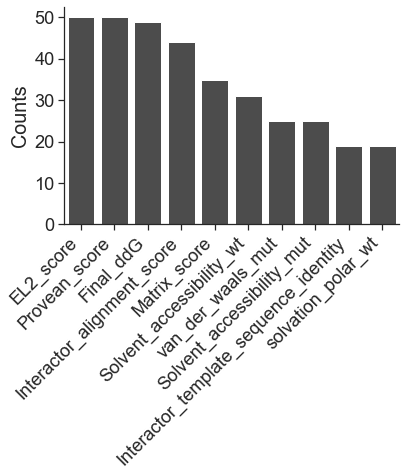

In [25]:
visualize_distribution_top_n_features(predator.shap_feature_selector, 10)  # available for each shap_top_ns.

MEDIANS: [59, 105]


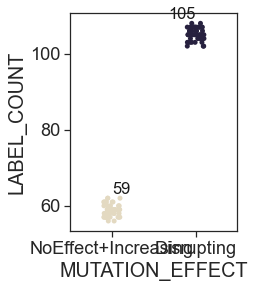

In [26]:
visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='strip')

MEDIANS: [59, 105]
Plot figures/train_datasets_label_counts_2022-06-20.pdf is exported.


<Figure size 432x432 with 0 Axes>

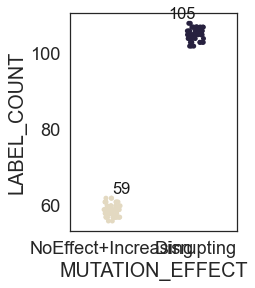

In [27]:
plt.figure(figsize=(6, 6))
sns.set_style("white")
sns.set_context(font_scale=1.25, rc={"lines.linewidth": 2.5})

visualize_sampled_train_datasets_label_counts(predator.data_materials["sampled_train_data_list"], kind='strip')

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/train_datasets_label_counts_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError

plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot {filename} is exported.")

,Experiment,Acc_scores,Balan_acc_scores,Models_type
0,0,0.636364,0.625000,Tuned+FeatureSelected
1,1,0.636364,0.625000,Tuned+FeatureSelected
2,2,0.787879,0.744048,Tuned+FeatureSelected
3,3,0.727273,0.659091,Tuned+FeatureSelected
4,4,0.575758,0.545455,Tuned+FeatureSelected
5,5,0.636364,0.589286,Tuned+FeatureSelected
6,6,0.727273,0.714286,Tuned+FeatureSelected
7,7,0.606061,0.619048,Tuned+FeatureSelected
8,8,0.848485,0.840909,Tuned+FeatureSelected
9,9,0.787879,0.761905,Tuned+FeatureSelected


       Experiment  Acc_scores  Balan_acc_scores
count    50.00000   50.000000         50.000000
mean     24.50000    0.721818          0.686861
std      14.57738    0.072616          0.076271
min       0.00000    0.575758          0.545455
25%      12.25000    0.696970          0.636364
50%      24.50000    0.727273          0.681818
75%      36.75000    0.757576          0.725514
max      49.00000    0.878788          0.863095
2022-06-20 10:23:56 | INFO     | helpers.helpers_predator.evaluation | balanced_acc_threshold: 0.6363636363636364
2022-06-20 10:23:56 | INFO     | helpers.helpers_predator.evaluation | bad_models_ix: [0, 1, 4, 5, 7, 12, 13, 21, 26, 30, 34, 39]
2022-06-20 10:23:56 | INFO     | helpers.helpers_predator.evaluation | qualified_models_ix: [2, 3, 6, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
                                 Number of Model
Default                            

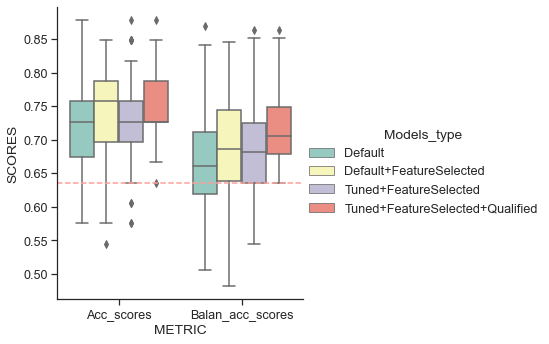

In [28]:
predator.compare_tuned_models(kind='box')
file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/performance_comparison_models_type_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError

plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot {filename} is exported.")

In [4]:
import pandas as pd

In [37]:
df = pd.read_csv("../data/predictions_datasets/brca_prediction_2022-06-17/ed35a3a3/predictions_soft_2022-06-17.csv")
df["Prediction"].replace({ClassLabels.DISRUPTING: "Disrupting", ClassLabels.NONDISRUPTING: "Increasing or No Effect"}, inplace=True)
df

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,Increasing or No Effect,0.40648
1,Q15842,E237K,Q14654,Disrupting,0.52114
2,Q15842,E237K,P63252,Disrupting,0.57654
3,Q9UKS6,R24H,Q9BY11,Disrupting,0.52710
4,Q9UKS6,R24H,Q9UNF0,Disrupting,0.61854
...,...,...,...,...,...
3986,P62140,F169C,P41236,Disrupting,0.65475
3987,P61371,D207E,Q969G2,Disrupting,0.67442
3988,P61371,D207E,Q8TE12,Disrupting,0.67087
3989,P61371,D207E,Q96A47,Disrupting,0.68717


In [82]:
pd.concat([
    df["Prediction"].value_counts().rename("BRCA", axis=0).T,
    df["Prediction"].value_counts().rename("BRCA", axis=0).T
], axis=1)

,BRCA,BRCA
Disrupting,2004,2004
Increasing or No Effect,1987,1987


In [151]:
def distribution_of_predictions_across_tcga(export=False):
    
    brca_predictions_path = r"../data/predictions_datasets/brca_prediction_2022-06-17/ed35a3a3/predictions_soft_2022-06-17.csv"
    coad_predictions_path = r"../data/predictions_datasets/coad_prediction_2022-06-17/84fd283a/predictions_soft_2022-06-17.csv"
    esca_predictions_path = r"../data/predictions_datasets/esca_prediction_2022-06-17/f2d1e99a/predictions_soft_2022-06-17.csv"
    gbm_predictions_path = r"../data/predictions_datasets/gbm_prediction_2022-06-17/8d7f7caa/predictions_soft_2022-06-17.csv"
    hnsc_predictions_path = r"../data/predictions_datasets/hnsc_prediction_2022-06-17/76f498d9/predictions_soft_2022-06-17.csv"
    ov_predictions_path = r"../data/predictions_datasets/ov_prediction_2022-06-17/865d1897/predictions_soft_2022-06-17.csv"

    tcga_cohort_names = ["BRCA", "COAD", "ESCA", "GBM", "HNSC", "OV"]
    
    tcga_predictions_paths = [
        brca_predictions_path,
        coad_predictions_path,
        esca_predictions_path,
        gbm_predictions_path,
        hnsc_predictions_path,
        ov_predictions_path
    ]

    for tcga, tcga_predictions_path in zip(tcga_cohort_names, tcga_predictions_paths):
        tcga_predictions = pd.read_csv(tcga_predictions_path)
        tcga_predictions["Prediction"].replace({ClassLabels.DISRUPTING: "Disrupting", ClassLabels.NONDISRUPTING: "Increasing or No Effect"}, inplace=True)

        print(f"TCGA: {tcga}")
        print(f"{tcga_predictions.shape}")
        print(f"{tcga_predictions['Prediction'].value_counts()}")
        print("==========================================")

    brca_data = pd.read_csv(brca_predictions_path)
    coad_data = pd.read_csv(coad_predictions_path)
    esca_data = pd.read_csv(esca_predictions_path)
    gbm_data = pd.read_csv(gbm_predictions_path)
    hnsc_data = pd.read_csv(hnsc_predictions_path)
    ov_data = pd.read_csv(ov_predictions_path)

    for tcga_data in [brca_data, coad_data, esca_data, gbm_data, hnsc_data, ov_data]:
        tcga_data["Prediction"].replace({ClassLabels.DISRUPTING: "Disrupting", ClassLabels.NONDISRUPTING: "Increasing or No Effect"}, inplace=True)

    concated = pd.concat(
        [
            brca_data["Prediction"].value_counts().rename("BRCA", axis=0).T,
            coad_data["Prediction"].value_counts().rename("COAD", axis=0).T,
            esca_data["Prediction"].value_counts().rename("ESCA", axis=0).T,
            gbm_data["Prediction"].value_counts().rename("GBM", axis=0).T,
            hnsc_data["Prediction"].value_counts().rename("HNSC", axis=0).T,
            ov_data["Prediction"].value_counts().rename("OV", axis=0).T
        ], axis=1
    )

    concated = concated.reset_index()
    concated = concated.rename(columns={"index":'Mutation Effect'})

    # concated.index.name = "Mutation Effect"
    # concated = concated.reset_index()

    concated_final = concated.melt(id_vars=["Mutation Effect"], var_name="TCGA Cohorts", value_name="# of Interactions")
    
    plt.figure(figsize=(8, 6), dpi=600)
    sns.set_theme(style="ticks", palette="Set1", font_scale=1.30)  # Set2, Accent | white, ticks
#     sns.set_theme(style="ticks", palette="pastel", font_scale=1.30)
    # plt.rc('font', family='serif')
    sns.barplot(x="TCGA Cohorts", y="# of Interactions", hue="Mutation Effect", data=concated_final)
    # plt.xticks(ha='right', rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend(loc='upper right')
    title_string_1 = "Distribution\ of\ Predicted\ Interactions\ Across\ TCGA\ Datasets"
    title_string_2 = ""
    # plt.title(f"$\mathbf{{{title_string_1}}}$", fontweight='bold')

    if export:
        file_date = datetime.today().strftime('%Y-%m-%d')
        filename = f"figures/distribution_on_tcga_{file_date}.pdf"
        if op.isfile(filename):
            raise FileExistsError

        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print("Plot is exported.")
    
    plt.show()


TCGA: BRCA
(3991, 5)
Disrupting                 2004
Increasing or No Effect    1987
Name: Prediction, dtype: int64
TCGA: COAD
(7496, 5)
Disrupting                 3864
Increasing or No Effect    3632
Name: Prediction, dtype: int64
TCGA: ESCA
(1189, 5)
Disrupting                 622
Increasing or No Effect    567
Name: Prediction, dtype: int64
TCGA: GBM
(2934, 5)
Increasing or No Effect    1476
Disrupting                 1458
Name: Prediction, dtype: int64
TCGA: HNSC
(3990, 5)
Disrupting                 2135
Increasing or No Effect    1855
Name: Prediction, dtype: int64
TCGA: OV
(2501, 5)
Disrupting                 1397
Increasing or No Effect    1104
Name: Prediction, dtype: int64
Plot is exported.


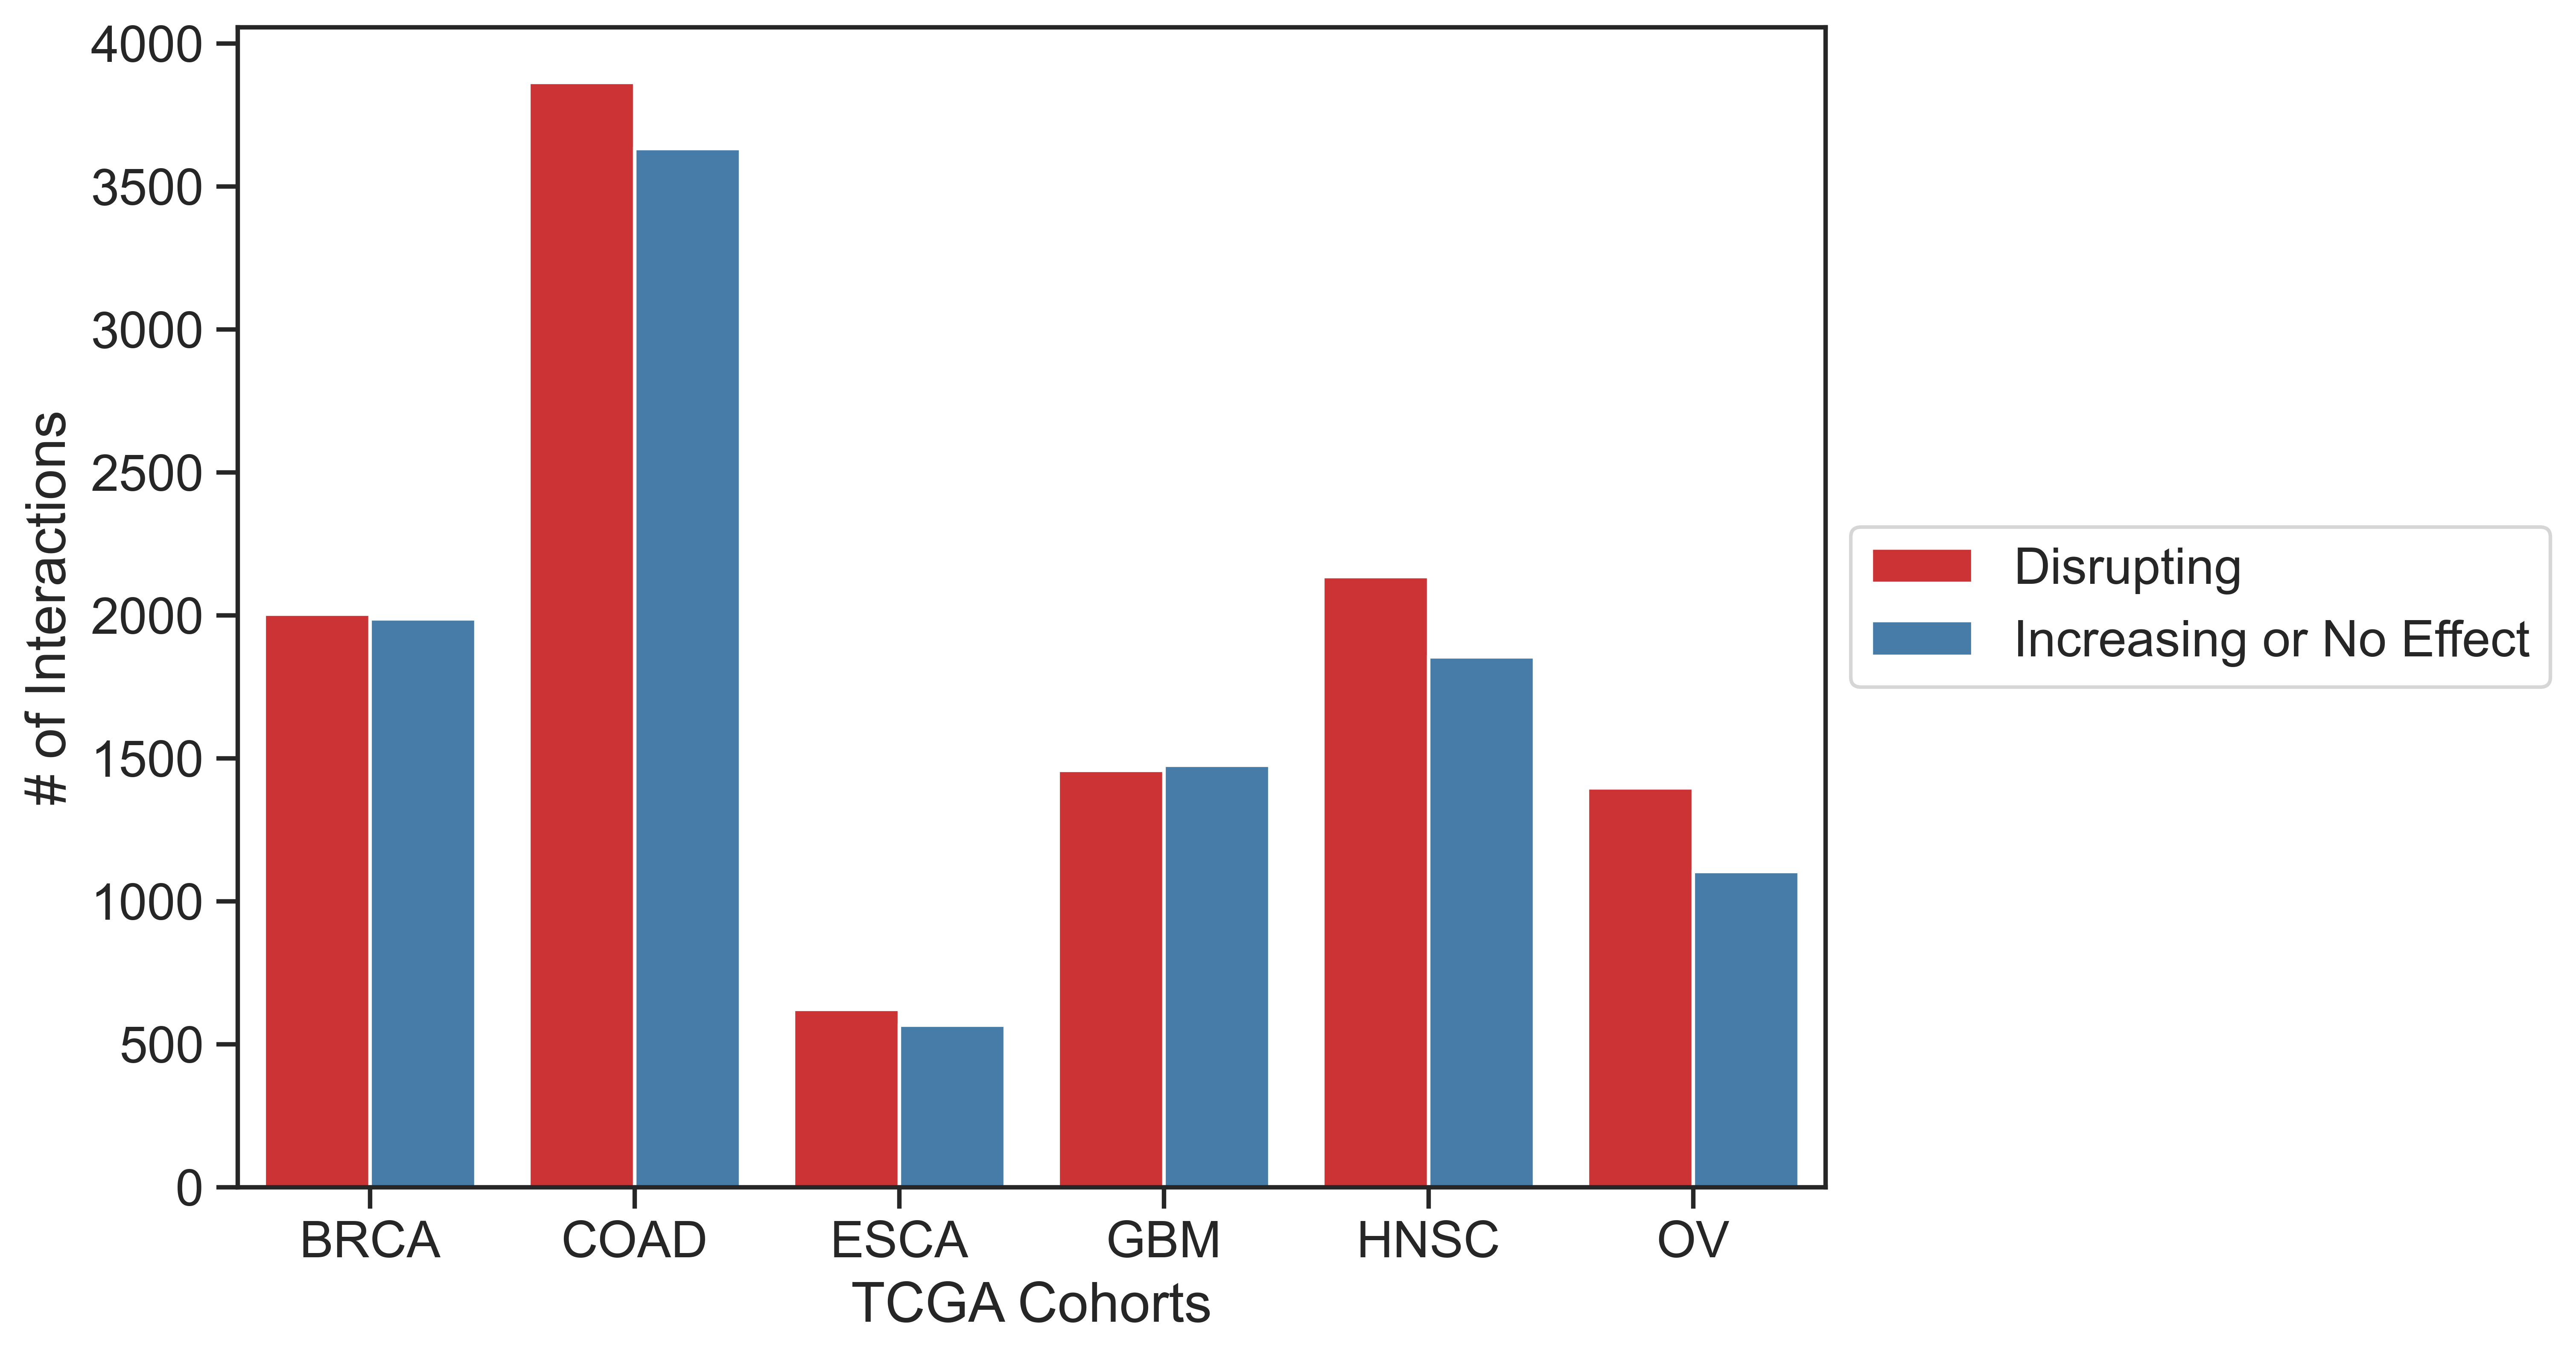

In [153]:
distribution_of_predictions_across_tcga(export=True)

## Figure Shap: to pdf

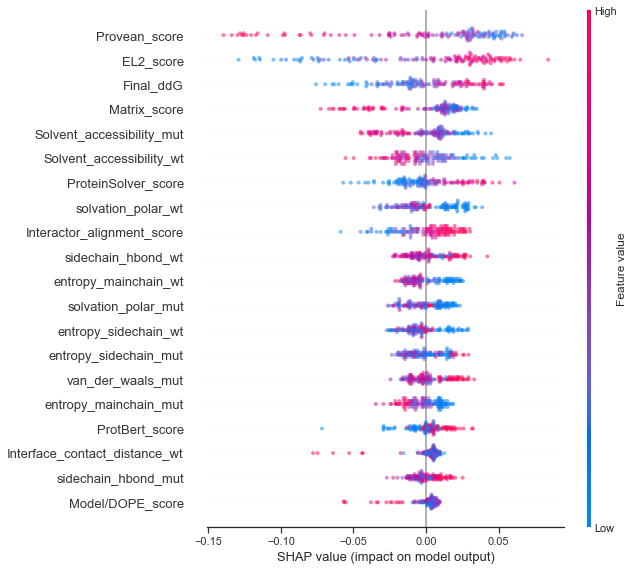

In [156]:
# maybe i can add the title and the names of the axis (later)
import shap

# plt.title("SHAP Summary Plot (Sampled data 38)")
fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[3][1],
    predator.data_materials["Xs_train"][3],
    show=False,
    alpha=0.5,
)

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap_summary_plot_trial_3_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
# plt.savefig(filename, dpi=300, bbox_inches='tight')
# print("Plot is exported.")

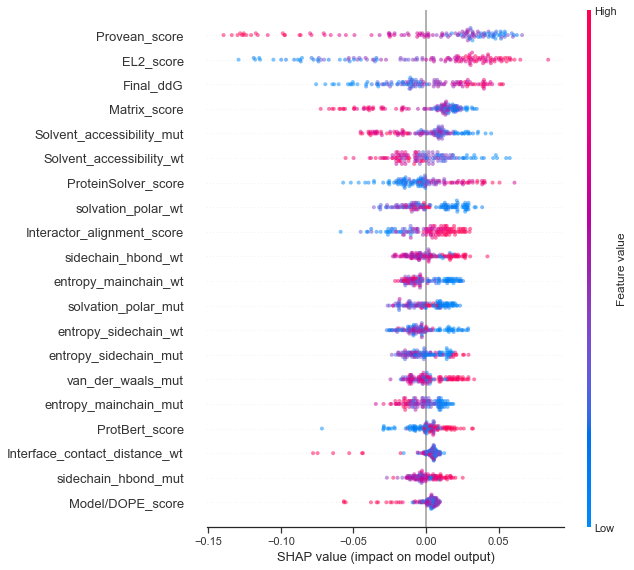

In [158]:
# maybe i can add the title and the names of the axis (later)
import shap

# plt.title("SHAP Summary Plot (Sampled data 38)")
fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[3][1],
    predator.data_materials["Xs_train"][3],
    show=False,
    alpha=0.5,
)

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap_summary_plot_trial_3_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
# plt.savefig(filename, dpi=300, bbox_inches='tight')
# print("Plot is exported.")

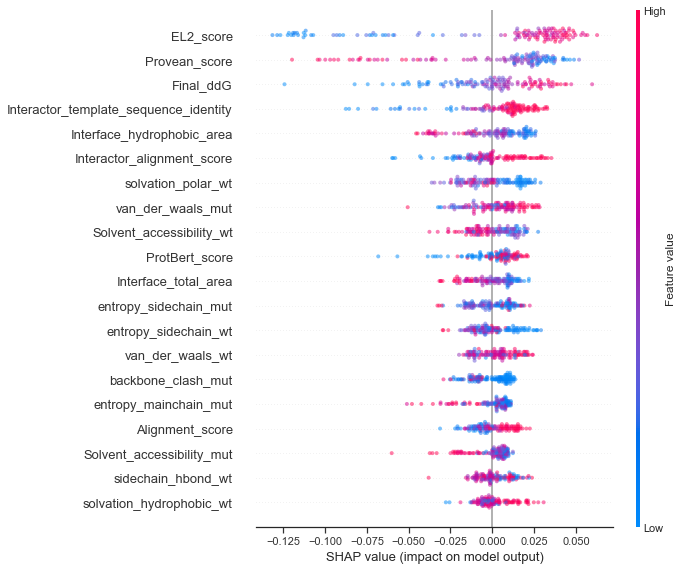

In [159]:
fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[26][1],
    predator.data_materials["Xs_train"][26],
    show=False,
    alpha=0.5,
)

In [160]:
def get_data_beautiful_colnames(df):
    renamed_df = df.copy()
    renamed_df.rename(
        {
            'Provean_score' : 'Provean score',
            'EL2_score' : 'EL2 score',
            'Final_ddG' : 'ELASPIC $\Delta\Delta$G',
            'Interactor_alignment_score' : 'Interactor alignment score',
            'Solvent_accessibility_wt' : 'Solvent accessibility (wildtype)',
            'Matrix_score' : 'BLOSUM62 Matrix score',
            'Solvent_accessibility_mut' : 'Solvent accessibility (mutant)',
            'van_der_waals_mut' : 'Van der Waals (mutant)',
            'Interactor_template_sequence_identity' : 'Interactor template sequence identity',
            'solvation_polar_wt' : 'Solvation polar (wildtype)'
        }, axis="columns", inplace=True,
    )

    return renamed_df

In [167]:
from src.helpers.helpers_predator.machine_learning_utils import get_default_classifier
import string


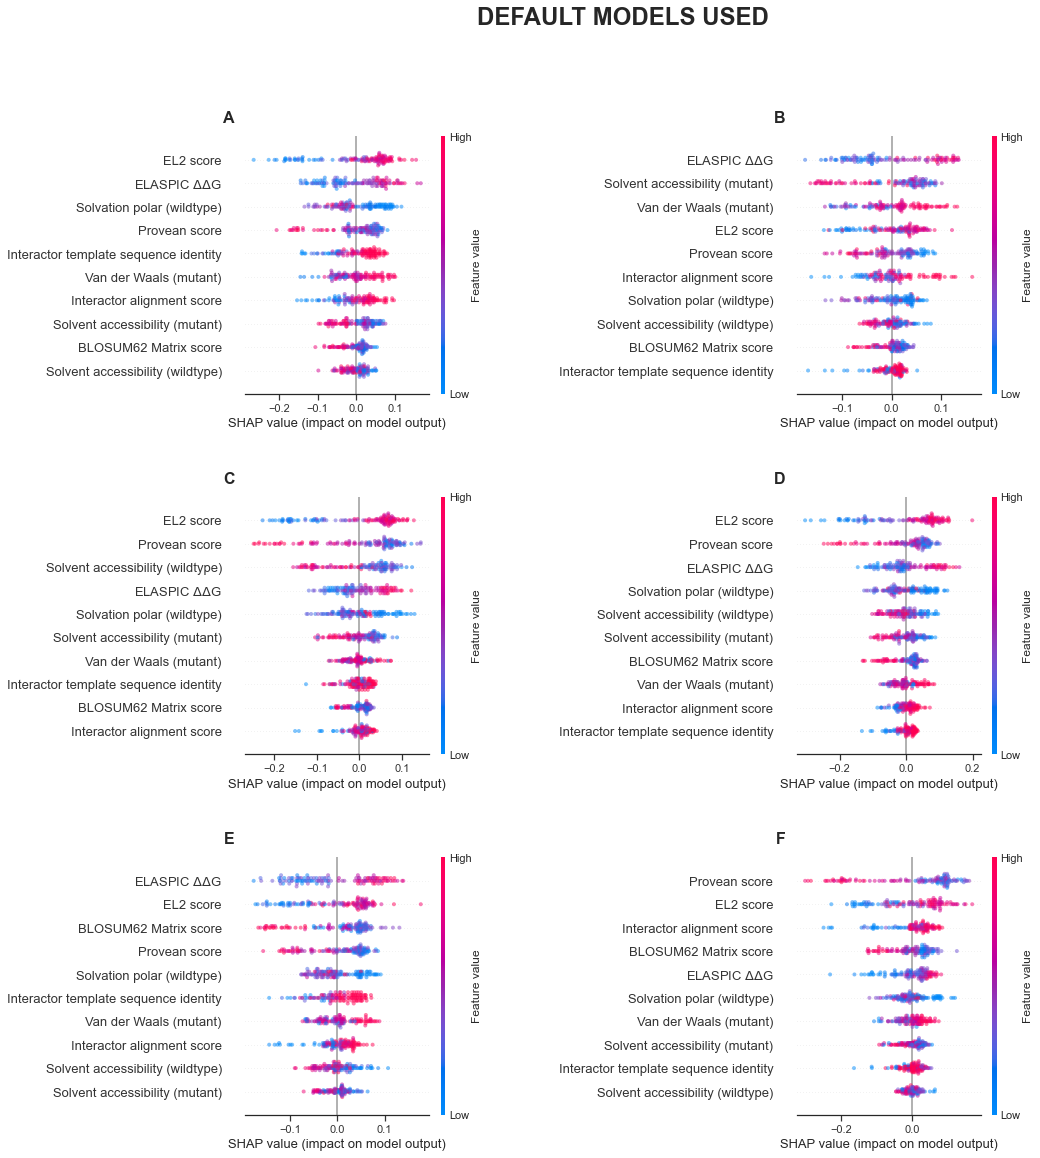

In [161]:
from src.helpers.helpers_predator.machine_learning_utils import get_default_classifier
import string


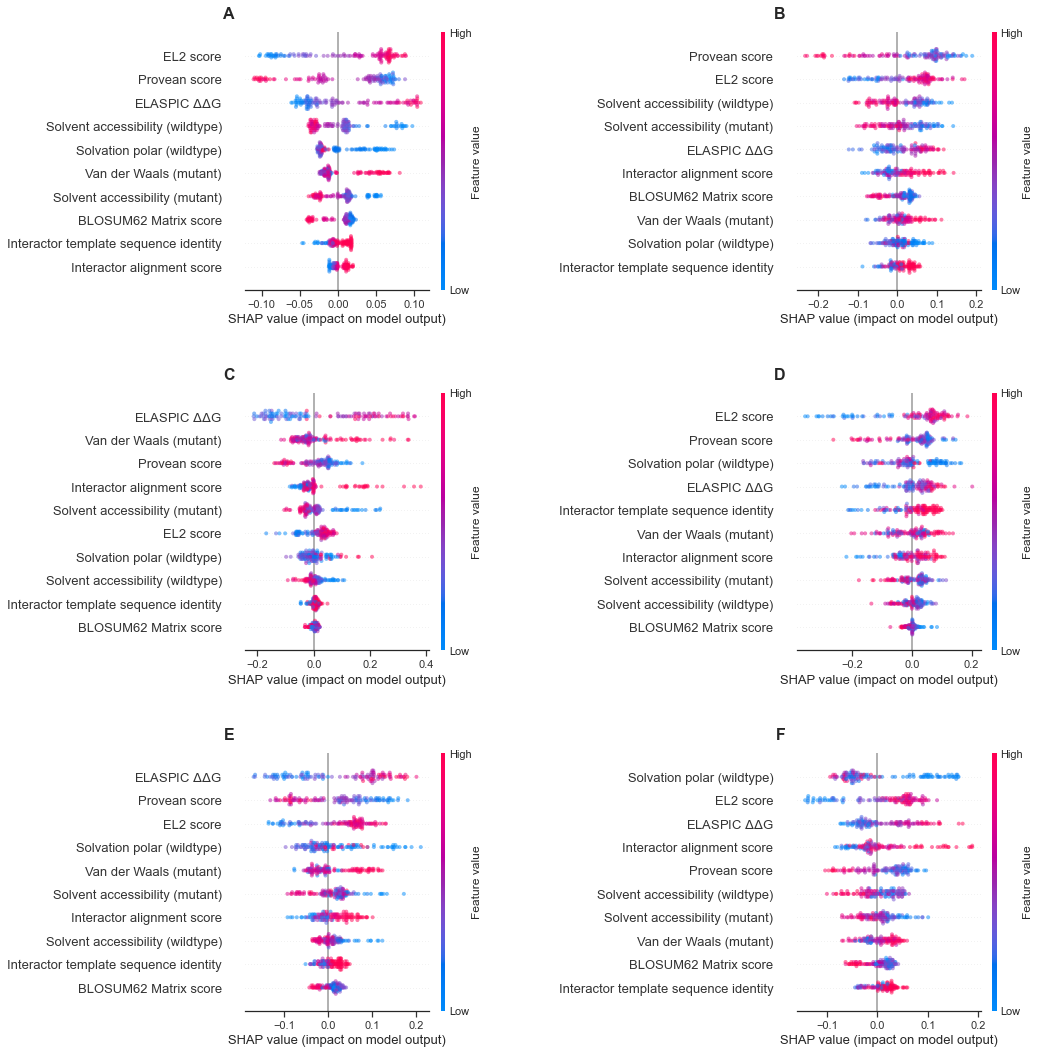

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
plt.subplots_adjust(wspace=1.4)
plt.subplots_adjust(hspace=0.4)
# plt.suptitle("TUNED MODELS USED", fontsize=24, fontweight='bold')

trials = [3, 13, 19, 26, 37, 43]

axiter = axes.flat #flatten axis to a list

letters = list(string.ascii_uppercase)[:6]

for ind, trial in enumerate(trials):
    model = predator.tuned_models[trial]
    model.fit(
        predator.data_materials["Xs_train"][trial][predator.determined_features],
        predator.data_materials["ys_train"][trial]
    )

    explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(
        predator.data_materials["Xs_train"][trial][predator.determined_features],
        approximate=False,
        check_additivity=False,
    )

    # axiter[ind].set_title(f"Trial {trial}")
    plt.subplot(3,2,ind+1)

    shap.summary_plot(
        shap_values[1],
        get_data_beautiful_colnames(
            predator.data_materials["Xs_train"][trial][predator.determined_features]
        ),
        show=False,
        plot_size=None,
        alpha=0.5,
    )

    axiter[ind].text(
        -0.06, 1.1, letters[ind], transform=axiter[ind].transAxes, fontsize=16, fontweight='bold', va='top', ha='right'
    )

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap_summary_plot_6-samples_10-features_tuned-models_{file_date}.pdf"
plt.savefig(filename, dpi=300, bbox_inches='tight')

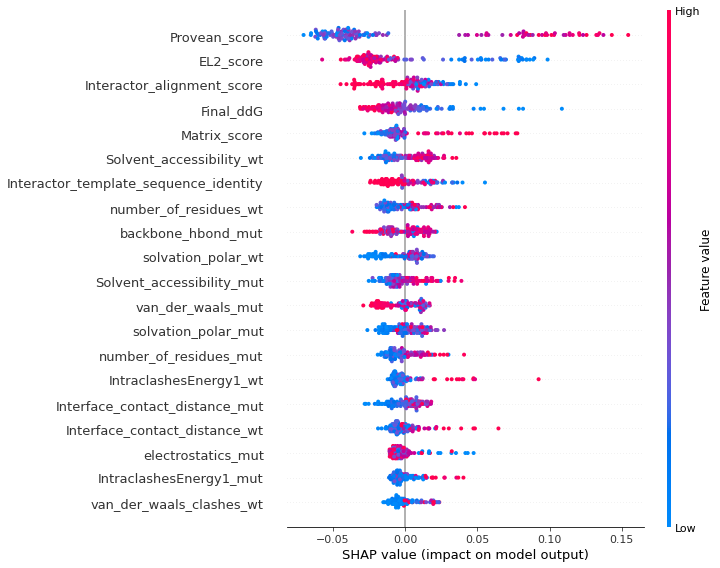

In [31]:
shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[26][1],
    predator.data_materials["Xs_train"][26]
)

In [18]:
print(predator.tuned_models[12])

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=60, random_state=71483)


In [19]:
model_x = predator.tuned_models[12]
model_x.fit(
    predator.data_materials["Xs_train"][12][predator.determined_features],
    predator.data_materials["ys_train"][12]
)

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=60, random_state=71483)

---------------

In [ ]:
# from now on, it looks a lot like a rabbit hole.

In [11]:
len(predator.tuned_models)

50

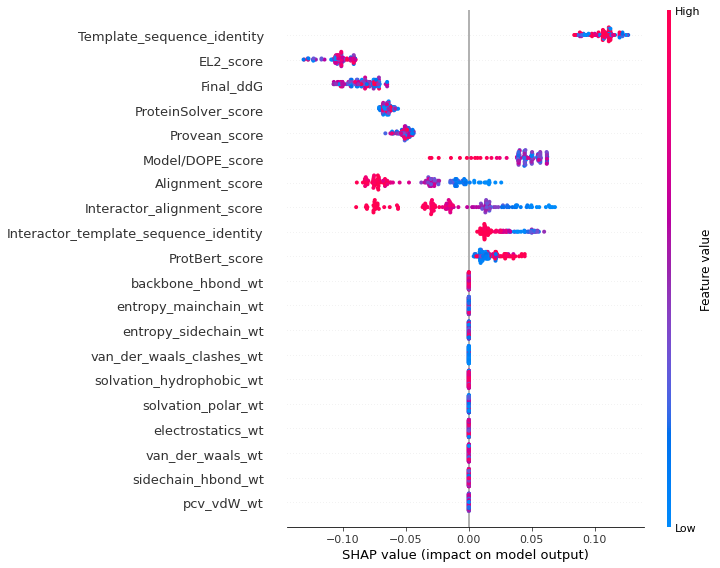

In [12]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(predator.tuned_models[3])

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(predator.data_materials["Xs_train"][3])

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], predator.data_materials["Xs_train"][3])

In [3]:
predator.determined_features

['Provean_score',
 'EL2_score',
 'Final_ddG',
 'Interactor_alignment_score',
 'Solvent_accessibility_wt',
 'Matrix_score',
 'Solvent_accessibility_mut',
 'van_der_waals_mut',
 'Interactor_template_sequence_identity',
 'solvation_polar_wt']

In [5]:
all_features = predator.data_materials["Xs_train"][0].columns.tolist()
selected_features = predator.determined_features
selected_features_index = [all_features.index(name) for name in selected_features]
selected_features_index

[9, 7, 4, 3, 11, 10, 12, 36, 2, 22]

In [43]:
def get_data_beautiful_colnames(df):
    renamed_df = df.copy()
    renamed_df.rename(
        {
            'Provean_score' : 'Provean score',
            'EL2_score' : 'EL2 score',
            'Final_ddG' : 'ELASPIC $\Delta\Delta$G',
            'Interactor_alignment_score' : 'Interactor alignment score',
            'Solvent_accessibility_wt' : 'Solvent accessibility wildtype',
            'Matrix_score' : 'BLOSUM62 Matrix score',
            'Solvent_accessibility_mut' : 'Solvent accessibility mutant',
            'van_der_waals_mut' : 'Van der Waals mutant',
            'Interactor_template_sequence_identity' : 'Interactor template sequence identity',
            'solvation_polar_wt' : 'Solvation polar wildtype'
        }, axis="columns", inplace=True,
    )

    return renamed_df

In [ ]:
df_beautiful_names.rename(
    {
        'Provean_score' : 'Provean score',
        'EL2_score' : 'EL2 score',
        'Final_ddG' : 'ELASPIC $\Delta\Delta$G',
        'Interactor_alignment_score' : 'Interactor alignment score',
        'Solvent_accessibility_wt' : 'Solvent accessibility wildtype',
        'Matrix_score' : 'BLOSUM62 Matrix score',
        'Solvent_accessibility_mut' : 'Solvent accessibility mutant',
        'van_der_waals_mut' : 'Van der Waals mutant',
        'Interactor_template_sequence_identity' : 'Interactor template sequence identity',
        'solvation_polar_wt' : 'Solvation polar wildtype'
    }, axis="columns", inplace=True,
)

Plot trial_26 is exported.


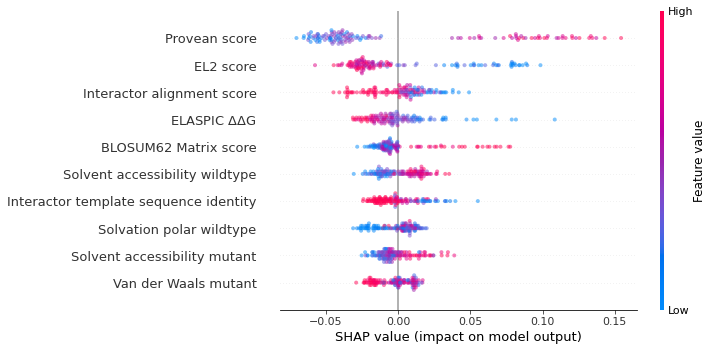

In [55]:
import shap

# trial = 3
# trial = 19
trial = 26
# trial = 37
# trial = 43

fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[trial][1][:, selected_features_index],
    get_data_beautiful_colnames(predator.data_materials["Xs_train"][trial].loc[:, selected_features]),
    show=False,
    alpha=0.5,
)

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap/shap_summary_plot_10-features_trial_{trial}_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
plt.savefig(filename, dpi=300, bbox_inches='tight')

print(f"Plot trial_{trial} is exported.")

trial: 3
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]
trial: 12
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]
trial: 19
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]
trial: 26
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]
trial: 37
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]
trial: 43
selected_features_index: [9, 7, 4, 3, 11, 10, 12, 36, 2, 22]


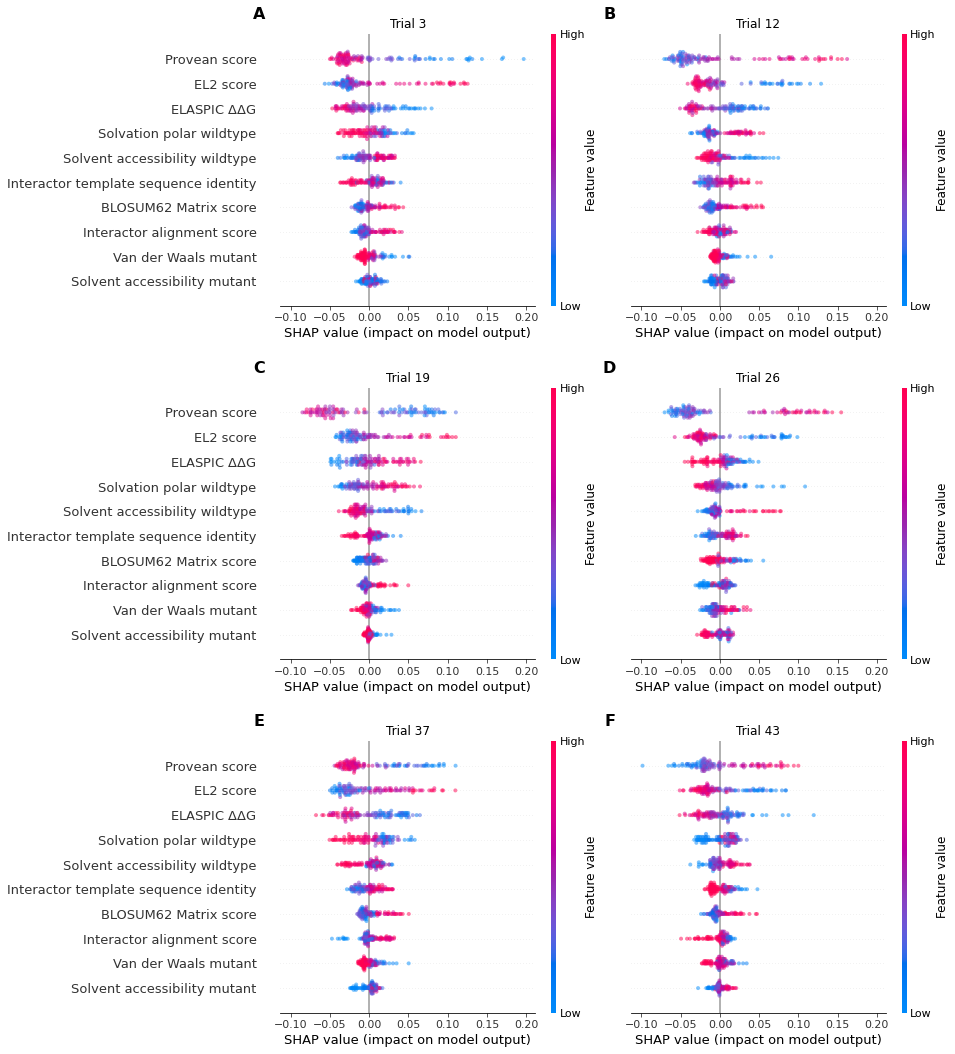

In [93]:
import matplotlib.pyplot as plt
import string

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12, 18))
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.3)

trials = [3, 12, 19, 26, 37, 43]

axiter = axes.flat #flatten axis to a list

letters = list(string.ascii_uppercase)[:6]

for ind, trial in enumerate(trials):
    print(f"trial: {trial}")
    all_features = predator.data_materials["Xs_train"][trial].columns.tolist()
    selected_features = predator.determined_features
    selected_features_index = [all_features.index(name) for name in selected_features]
    print(f"selected_features_index: {selected_features_index}")

    axiter[ind].set_title(f"Trial {trial}")
    plt.subplot(3,2,ind+1)
    shap.summary_plot(
        predator.shap_feature_selector.shap_values_train_list[trial][1][:, selected_features_index],
        get_data_beautiful_colnames(predator.data_materials["Xs_train"][trial].loc[:, selected_features]),
        show=False,
        plot_size=None,
        alpha=0.5,
    )

    axiter[ind].text(
        -0.06, 1.1, letters[ind], transform=axiter[ind].transAxes, fontsize=16, fontweight='bold', va='top', ha='right'
    )

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap/shap_summary_plot_10-features_in_one_fig_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
# plt.savefig(filename, dpi=300, bbox_inches='tight')

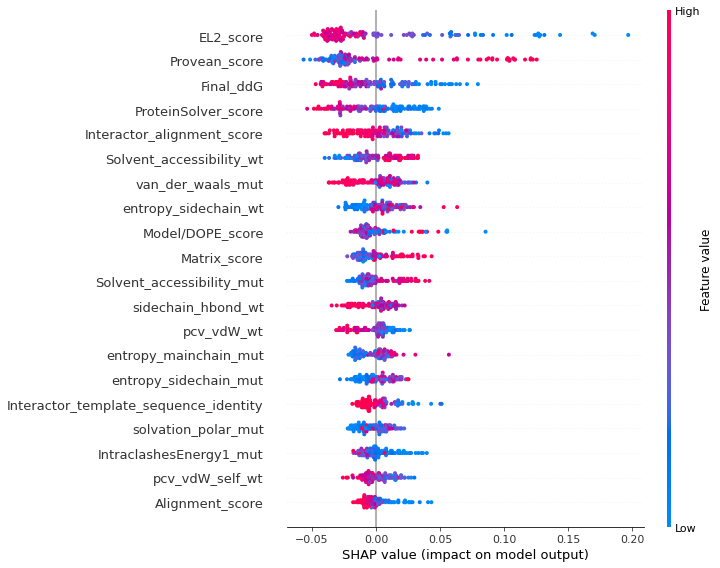

In [94]:
shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[3][1],
    predator.data_materials["Xs_train"][3]
)

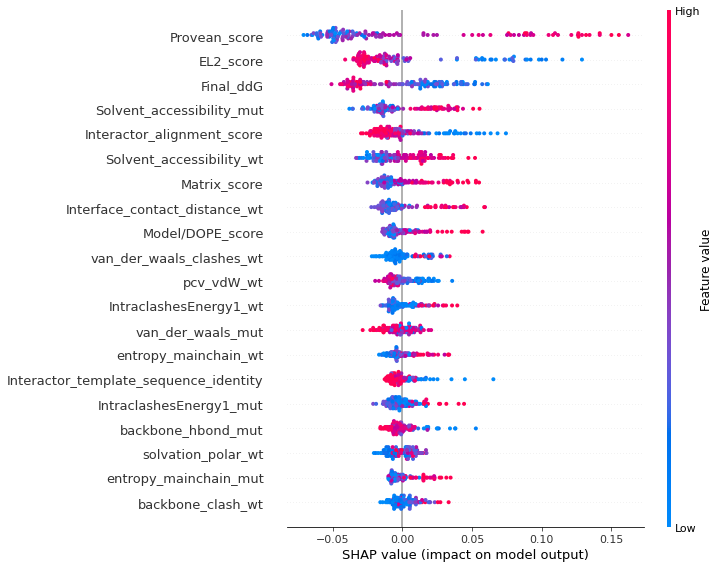

In [95]:
shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[12][1],
    predator.data_materials["Xs_train"][12]
)

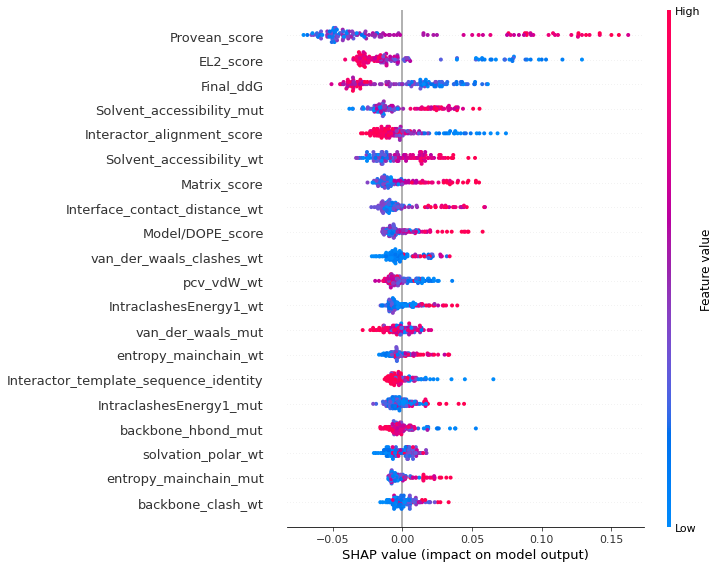

In [103]:
df_12 = predator.data_materials["Xs_train"][12].copy()
shap_values_12 = predator.shap_feature_selector.shap_values_train_list[12][1].copy()
shap.summary_plot(
    shap_values_12,
    df_12,
)

In [96]:
predator.data_materials["Xs_train"][12]

,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,EL2_score,Model/DOPE_score,Provean_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
79,0.6778,0.688808,0.2328,0.251479,0.436504,0.776280,0.168707,1.829477,-0.136505,-2.421,...,395.0,91.8074,91.5422,113.30800,113.28000,341.830,369.890,711.720,2.53137,3.84675
149,0.3443,0.296610,0.4607,0.310016,1.077310,0.994066,0.034041,2.353722,1.049190,-4.914,...,447.0,226.9170,230.9330,104.54500,104.54500,0.000,186.230,0.000,3.06862,3.35457
36,0.4162,0.330912,0.9689,0.461749,1.177760,0.860902,0.346340,1.497482,-0.391785,-3.503,...,602.0,130.7390,134.6000,79.22310,79.22310,476.390,321.305,797.700,4.96193,4.96193
109,0.9012,0.843648,1.0000,0.918605,2.661090,0.991246,0.023728,2.252292,-1.666830,-12.793,...,161.0,16.0402,16.0921,21.73500,21.73500,1078.670,479.795,1558.460,2.66772,2.66772
27,0.5246,0.498518,0.8462,0.828401,3.133850,0.974581,0.299199,2.524872,-1.584200,-3.958,...,127.0,15.9400,17.0484,4.20352,4.21634,565.170,102.370,667.545,3.49176,2.95480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.2782,0.207890,0.9796,0.746897,-0.088496,-0.034741,0.046180,-1.052555,-0.469988,-3.263,...,326.0,95.7468,95.8750,20.66020,20.66020,0.000,0.000,0.000,3.43916,3.76957
112,1.0000,0.913580,0.9167,0.920865,1.630530,-0.019576,0.202996,1.336412,-1.444120,-9.979,...,244.0,34.2875,35.1550,16.02880,19.36480,489.450,215.385,704.830,3.14559,2.57654
70,1.0000,1.000000,1.0000,0.973684,2.092150,0.015000,0.043362,0.383879,-0.601846,-4.118,...,245.0,19.3620,19.3677,29.58150,29.58150,248.920,161.845,410.760,2.91983,2.91983
163,0.9927,0.958098,0.7766,0.779207,1.361240,0.856605,0.073062,1.915361,-0.536273,-5.553,...,549.0,73.4130,75.7782,306.19500,307.22200,0.000,302.145,0.000,3.14380,3.28458


In [97]:
predator.shap_feature_selector.shap_values_train_list[12][1]

array([[ 0.00989322,  0.00721085,  0.03520064, ...,  0.0080135 ,
         0.0049862 ,  0.00705508],
       [-0.00121498,  0.00575388,  0.0154608 , ...,  0.00237076,
        -0.00389395, -0.00154366],
       [-0.02287433, -0.00345009, -0.00588874, ..., -0.00231526,
         0.01798128,  0.00230373],
       ...,
       [-0.00165529, -0.01129917, -0.00972512, ..., -0.00493157,
        -0.01043014, -0.0023103 ],
       [-0.00376206, -0.00050838,  0.00327508, ..., -0.00043032,
        -0.00964184, -0.00714195],
       [-0.00872211, -0.00150345, -0.00860823, ..., -0.00396423,
         0.02033997,  0.01034843]])

Plot trial_43 is exported.


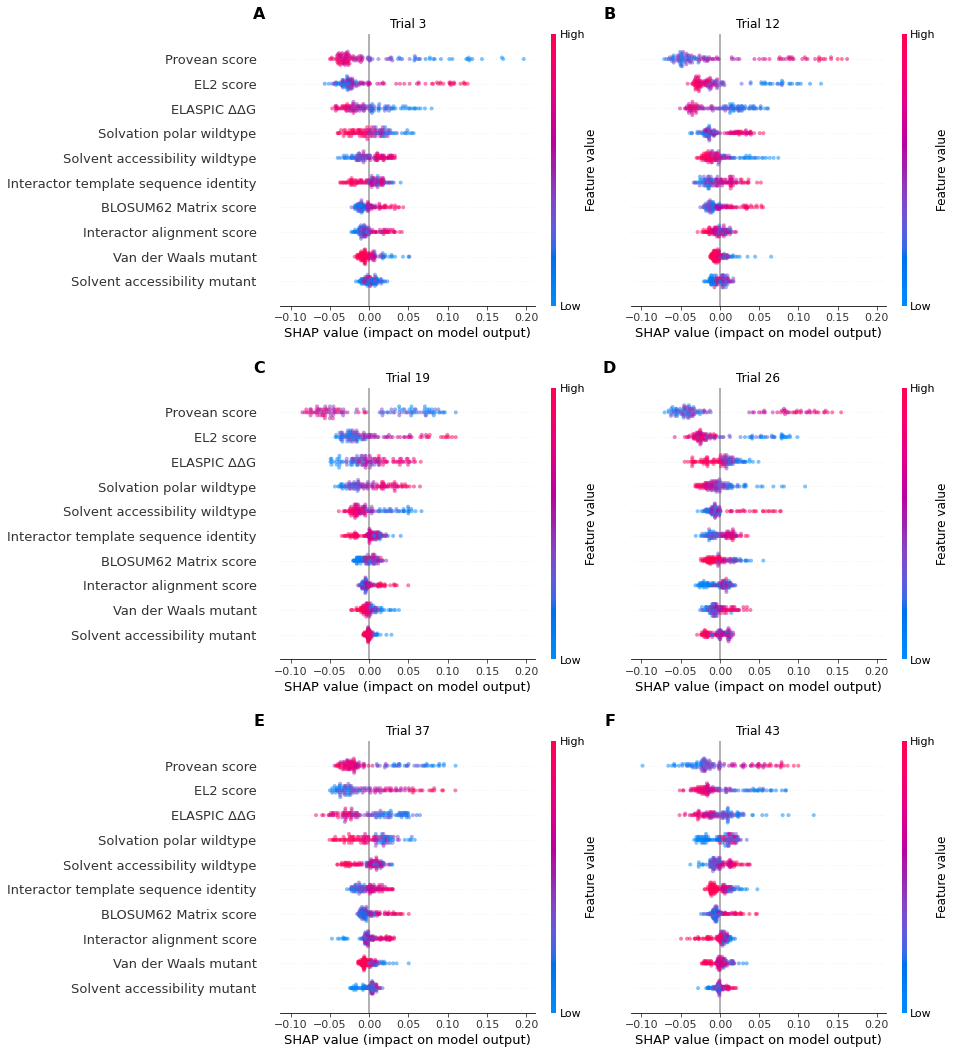

In [90]:
# import matplotlib.pyplot as plt
# import string
#
# fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12, 18))
# plt.subplots_adjust(wspace=0.1)
# plt.subplots_adjust(hspace=0.3)
#
# trials = [3, 12, 19, 26, 37, 43]
#
# axiter = axes.flat #flatten axis to a list
#
# letters = list(string.ascii_uppercase)[:6]
#
# for ind, trial in enumerate(trials):
#
#     all_features = predator.data_materials["Xs_train"][trial].columns.tolist()
#     selected_features = predator.determined_features
#     selected_features_index = [all_features.index(name) for name in selected_features]
#     # selected_features_index
#
#     axiter[ind].set_title(f"Trial {trial}")
#     plt.subplot(3,2,ind+1)
#     shap.summary_plot(
#         predator.shap_feature_selector.shap_values_train_list[trial][1][:, selected_features_index],
#         get_data_beautiful_colnames(predator.data_materials["Xs_train"][trial].loc[:, selected_features]),
#         show=False,
#         plot_size=None,
#         alpha=0.5,
#     )
#
#     axiter[ind].text(
#         -0.06, 1.1, letters[ind], transform=axiter[ind].transAxes, fontsize=16, fontweight='bold', va='top', ha='right'
#     )
#
# file_date = datetime.today().strftime('%Y-%m-%d')
# filename = f"figures/shap/shap_summary_plot_10-features_in_one_fig_{file_date}.pdf"
# # if op.isfile(filename):
# #     raise FileExistsError
# plt.savefig(filename, dpi=300, bbox_inches='tight')

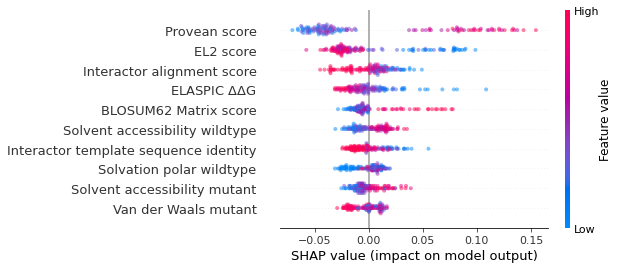

In [67]:
shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[trial][1][:, selected_features_index],
    get_data_beautiful_colnames(predator.data_materials["Xs_train"][trial].loc[:, selected_features]),
    show=False,
    plot_size=None,
    alpha=0.5,
)

In [ ]:
        ax.text(-0.06, 1.1, letter, transform=ax.transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

In [50]:
import shap

# trial = 3
# trial = 19
# trial = 26
# trial = 37
trial = 43

fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[trial][1][:, selected_features_index],
    predator.data_materials["Xs_train"][trial][:, selected_features_index],
    show=False,
    alpha=0.5,
)

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap/shap_summary_plot_10-features_trial_{trial}_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
plt.savefig(filename, dpi=300, bbox_inches='tight')

print(f"Plot trial_{trial} is exported.")

TypeError: '(slice(None, None, None), ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt'])' is an invalid key

array([[ 5.08317892e-03, -4.29963674e-03,  4.16989747e-03, ...,
        -3.21665058e-03,  5.86905056e-03, -2.73155607e-03],
       [ 5.23146558e-05,  1.22727495e-02, -1.25285793e-02, ...,
        -3.63880448e-03, -2.05425158e-03,  1.58084761e-03],
       [-4.46094258e-03, -1.29066823e-02,  5.99781594e-04, ...,
         1.81051239e-03,  4.33181498e-03, -2.61759594e-04],
       ...,
       [-3.46779386e-03, -5.02141105e-03, -1.08231151e-02, ...,
        -4.48666684e-03,  1.49873996e-03,  1.77345577e-03],
       [-2.36970742e-03, -5.60497433e-03, -1.08035199e-02, ...,
         1.95371855e-03,  6.85158813e-04, -1.13586140e-04],
       [-6.26174538e-04, -6.59782622e-03, -9.78205316e-03, ...,
        -1.89201199e-03, -1.43539126e-03, -6.21625745e-03]])

Plot trial_43 is exported.


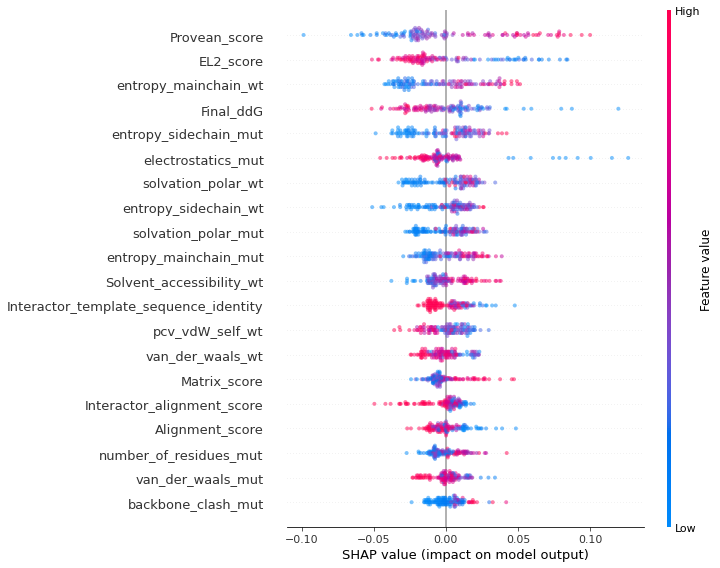

In [17]:
import shap

# trial = 3
# trial = 19
# trial = 26
# trial = 37
trial = 43

fig = shap.summary_plot(
    predator.shap_feature_selector.shap_values_train_list[trial][1],
    predator.data_materials["Xs_train"][trial],
    show=False,
    alpha=0.5,
)

file_date = datetime.today().strftime('%Y-%m-%d')
filename = f"figures/shap_summary_plot_trial_{trial}_{file_date}.pdf"
# if op.isfile(filename):
#     raise FileExistsError
plt.savefig(filename, dpi=300, bbox_inches='tight')

print(f"Plot trial_{trial} is exported.")

## Prediction TCGA on Cancer Dataset: OV

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-11-17 16:37:29 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-11-17 16:37:29 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:37:30 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


#### TCGA Cancer Datasets

##### OV

In [4]:
display_data(predator.data_materials["ov"])

Data dimensions: (5092, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


#### Preprocessed TCGA Cancer Datasets

##### OV

In [5]:
display_data(predator.data_materials["target_ov_data"])

Data dimensions: (5092, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


In [7]:
predator.predict(voting='soft')

2021-11-17 16:37:44 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-17 16:37:44 | DEBUG    | Predator | Predicting on ov cohort ..
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-17 16:37:44 | DEBUG    | helpers.helpers_predator.models | X shape: (5092, 10)
2021-11-17 16:37:45 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, n

In [8]:
predator.predictions.keys()

dict_keys(['ov_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["ov_prob"][:3]

[array([[0.59952734, 0.40047266],
        [0.63188723, 0.36811277],
        [0.52475222, 0.47524778],
        ...,
        [0.65248365, 0.34751635],
        [0.67623588, 0.32376412],
        [0.65464449, 0.34535551]]),
 array([[1.        , 0.        ],
        [1.        , 0.        ],
        [0.43333333, 0.56666667],
        ...,
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ]]),
 array([[0.78724328, 0.21275672],
        [0.82463448, 0.17536552],
        [0.6362759 , 0.3637241 ],
        ...,
        [0.77263679, 0.22736321],
        [0.70747215, 0.29252785],
        [0.72762164, 0.27237836]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-11-17 16:37:52 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:38:13 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 655): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.539514  P00742    I451M     P10646
1    0.449693  P00742    I451M     P10646
2    0.449693  P00742    I451M     P10646
3    0.537670  P00742    I451M     P10646
4    0.537670  P00742    I451M     P10646
2021-11-17 16:38:34 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 611): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0         0.0  Q14814     K31T     Q02078
1         1.0  Q14814     K31T     Q02078
2         0.0  Q14814     K31T     Q02078
3         1.0  Q14814     K31T     Q02078
4         0.0  Q14814     K31T     Q02078
2021-11-17 16:38:54 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 582): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.440924  Q9NQ66    E539K     Q15147
1    0.514262  Q9NQ66    E539K     Q15147
2    0.

In [11]:
predator.predictions.keys()

dict_keys(['ov_prob', 'ov_predicted_probs_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["ov_predicted_probs_datasets"][0])

Data dimensions: (5092, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.400473,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.368113,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.475248,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


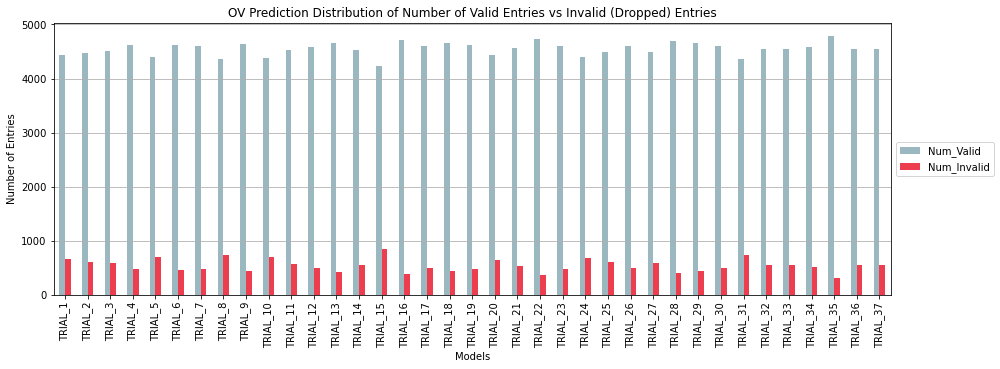

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-11-17 16:51:47 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


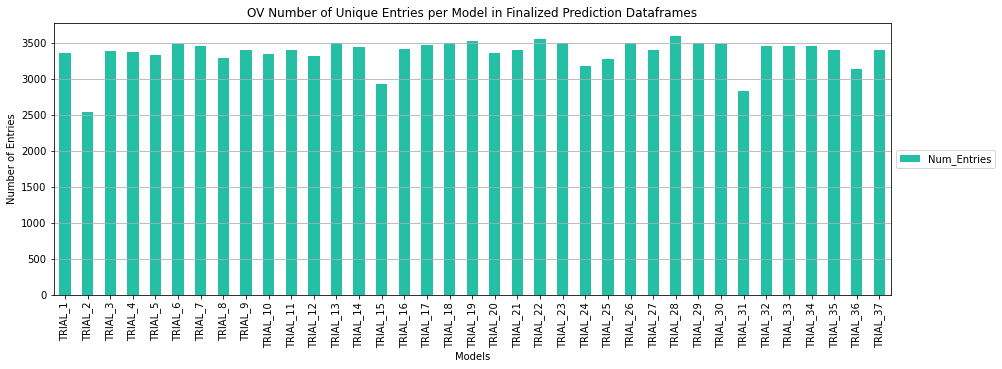

In [14]:
predator.predictions.plot_num_finalized_predictions("ov")

In [15]:
display_data(predator.predictions['ov_finalized_prediction_dataframes'][0])

Data dimensions: (3360, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.400473,P08134,D59E,P52565
1,0.368113,P08134,D59E,P52565
2,0.475248,P62993,A3V,Q9H8V3


In [16]:
predator.prepare_ensemble_prediction_data()

2021-11-17 16:51:48 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:51:48 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for ov is prepared.
Accessible from `ov_predictions_prob_data`.
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
Accessible from `ov_ensemble_prediction_data`.
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-11-17 16:56:29 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['ov_predictions_prob_data'])

Data dimensions: (2582, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.384293,0.0,0.194061,0.349944,0.170285,0.350122,0.464967,0.118365,0.233145,0.387556,...,0.151618,0.197612,0.218545,0.419339,0.370928,0.356374,0.312893,0.329366,0.28821,0
1,0.475248,0.566667,0.363724,0.487851,0.533333,0.588556,0.443974,0.277278,0.443032,0.453923,...,0.611111,0.573617,0.348948,0.595144,0.436047,0.553531,0.433921,0.506438,0.44397,0
2,0.561579,0.566667,0.310791,0.483148,0.603261,0.701266,0.51214,0.309409,0.614093,0.567638,...,0.644444,0.373617,0.360463,0.639978,0.541017,0.683096,0.640331,0.423847,0.51214,1


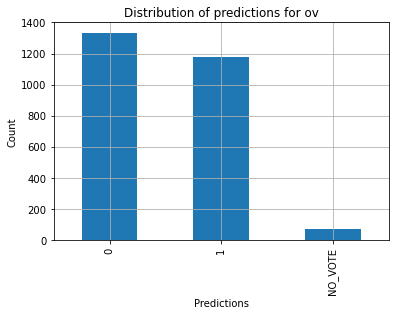

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [19]:
ov_prediction_results_soft = predator.predictions['ov_prediction_results']
display_data(ov_prediction_results_soft)

Data dimensions: (2582, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


In [20]:
ov_prediction_results_soft_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
display_data(ov_prediction_results_soft_no_votes_dropped)

Data dimensions: (2513, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


Label counts:
Disrupting                1334
Increasing + No Effect    1179
Name: Prediction, dtype: int64


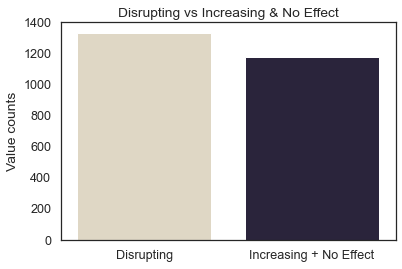

In [21]:
visualize_label_counts(ov_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
ov_ensemble_prediction_data_soft = predator.predictions["ov_ensemble_prediction_data"]

In [23]:
ov_predictions_prob_data_soft = predator.predictions["ov_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
ov_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["ov_prediction_results"],
    predictions_prob_data=predator.predictions["ov_predictions_prob_data"]
)
ov_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,0,0.28821
1,P62993,A3V,Q9H8V3,0,0.44397
2,P62993,A3V,Q14155,1,0.51214
3,O75175,Q684H,Q9NZN8,0,0.32091
4,O75175,Q684H,B2RDX7,0,0.3347


In [26]:
ov_prediction_results_soft_no_votes_dropped_with_median_probabilities = ov_prediction_results_soft_with_median_probs[
    ov_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(ov_prediction_results_soft_no_votes_dropped_with_median_probabilities)

2513

## Exporting Predictions

In [28]:
# ov_prediction_results = ov_prediction_results_hard_no_votes_dropped
# ov_prediction_results = ov_prediction_results_soft_no_votes_dropped
ov_prediction_results = ov_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(ov_prediction_results)

Data dimensions: (2513, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,0,0.28821
1,P62993,A3V,Q9H8V3,0,0.44397
2,P62993,A3V,Q14155,1,0.51214


In [29]:
predator.export_prediction(
    tcga="ov",
    data=ov_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-17 16:59:08 | DEBUG    | helpers.helpers_predator.common | Folder with ID 37bf1637 is created.
2021-11-17 16:59:08 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder ov_prediction_2021-11-17\37bf1637..
2021-11-17 16:59:08 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/ov_prediction_2021-11-17\37bf1637\predictions_soft_2021-11-17.csv is exported successfully.
2021-11-17 16:59:08 | INFO     | helpers.helpers_predator.common | Config is exported.


---